## 목차
### 1. train, valid 데이터셋 시각화 및 분석
#### 1.1 데이터셋 로드 및 구조 파악
#### 1.2 각 QA 문장 별 길이 분석
#### 1.3 Q/A에 대하여 최대, 최소길이 분석
### 2. 토크나이저 별 데이터셋 분석
#### 2.1 토크나이저 입력 셋팅
#### 2.2 입력 받은 토크나이저에 대한 로드
#### 2.3 해당 토크나이저로 train에 대한 unk 토큰 인식 분석

### 1. train, valid 데이터셋 시각화 및 분석

#### 1.1 데이터셋 로드 및 구조 파악

In [1]:
from datasets import load_from_disk

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 데이터 로드
train_data = load_from_disk("/data/ephemeral/home/project/level2-mrc-nlp-01/data/train_dataset/train")
valid_data = load_from_disk("/data/ephemeral/home/project/level2-mrc-nlp-01/data/train_dataset/validation")

In [16]:
# train_data, valid_data 구조파악
print(train_data)
print(valid_data)

Dataset({
    features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
    num_rows: 3952
})
Dataset({
    features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
    num_rows: 240
})


In [17]:
# 문맥 갯수 파악
print(len(train_data['context']))
print(len(valid_data['context']))

3952
240


In [20]:
# 대답 갯수 파악
print(len(train_data['answers']))
print(len(valid_data['answers']))

3952
240


In [23]:
# answers 형태 확인
train_data['answers'][0]

{'answer_start': [235], 'text': ['하원']}

In [27]:
# 다중 정답 확인
multiple_answers_train = [answer for answer in train_data['answers'] if len(answer['answer_start']) > 1 or len(answer['text']) > 1]
multiple_answers_valid = [answer for answer in valid_data['answers'] if len(answer['answer_start']) > 1 or len(answer['text']) > 1]

print(len(multiple_answers_train))
print(len(multiple_answers_valid))

0
0


#### 1.2 각 QA 문장 별 길이 분석
- max_token_answer 범위 내 정답이 모두 있는지
- train, valid의 context에 있어서 각각의 min, max

In [70]:
# train_data에서 답변 최대 길이
max_length_train_answer = max(len(answer['text'][0]) for answer in train_data['answers'] if answer['text'])
min_length_train_answer = min(len(answer['text'][0]) for answer in train_data['answers'] if answer['text'])

print(max_length_train_answer)
print(min_length_train_answer)

"""관련하여 현재 토크나이저의 max_answer 이 30인데 30개의 토큰 개수로 이 83개의 length가 표현 되는지는 분석과제임."""

83
1


'관련하여 현재 토크나이저의 max_answer 이 30인데 30개의 토큰 개수로 이 83개의 length가 표현 되는지는 분석과제임.'

In [56]:
# train 데이터셋 context 길이 분석
max_length_train_context = max(len(context) for context in train_data['context'])
min_length_train_context = min(len(context) for context in train_data['context'])
print(max_length_train_context)
print(min_length_train_context)

2059
512


In [57]:
# valid 데이터셋 context 길이 분석
max_length_valid_context = max(len(context) for context in valid_data['context'])
min_length_valid_context = min(len(context) for context in valid_data['context'])
print(max_length_valid_context)
print(min_length_valid_context)

2064
517


In [64]:
"""
train min, max (512. 2059)
valid min, max (517. 2064)
"""

'\ntrain min, max (512. 2059)\nvalid min, max (517. 2064)\n'

In [28]:
# 먼저 필요한 칼럼만 뽑아낸다.
# 그러기 위해 필요한 라이브러리 임포트
import pandas as pd

In [41]:
# 구조 재확인
print(train_data)
print(valid_data)

Dataset({
    features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
    num_rows: 3952
})
Dataset({
    features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
    num_rows: 240
})


In [43]:
import pandas as pd

# 필요한 컬럼만 선택
temp_train_df = {
    'title': [item['title'] for item in train_data],
    'context': [item['context'] for item in train_data],
    'id': [item['id'] for item in train_data],
    'answers_text': [item['answers']['text'][0] if item['answers']['text'] else '' for item in train_data]
}

# 데이터 프레임으로 변환
train_df = pd.DataFrame(temp_train_df)

# 출력 확인
train_df

,title,context,id,answers_text
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,mrc-1-000067,하원
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,mrc-0-004397,《경영의 실제》
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,mrc-1-000362,백성
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",mrc-0-001510,중국
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,mrc-0-000823,4개
...,...,...,...,...
3947,이오 (위성),이오의 산\n이오의 산 목록\n 이오에는 100~150개의 산이 있다. 이들 산의 ...,mrc-0-005285,지질 구조
3948,내니 다이어리,애니의 고군분투 뉴욕 입성기!!\n\n인류학자가 꿈인 21살 소녀 '애니(스칼렛 요...,mrc-1-000699,뉴저지
3949,빈 필하모니 관현악단,1842년에 작곡가이자 지휘자인 오토 니콜라이가 빈 궁정 오페라극장 소속 관현악단을...,mrc-0-003429,칼 에케르트
3950,드래곤,원어는 고대 그리스어까지 거슬러 올라간다. 영어 문헌에 이 말이 나타나기 시작한 것...,mrc-0-003956,슬라브 신화


In [44]:
# 필요한 컬럼만 선택
temp_valid_df = {
    'title': [item['title'] for item in valid_data],
    'context': [item['context'] for item in valid_data],
    'id': [item['id'] for item in valid_data],
    'answers_text': [item['answers']['text'][0] if item['answers']['text'] else '' for item in valid_data]
}

# 데이터 프레임으로 변환
valid_df = pd.DataFrame(temp_valid_df)

# 출력 확인
valid_df

,title,context,id,answers_text
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",mrc-0-003264,한보철강
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,mrc-0-004762,1871년
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",mrc-1-001810,나뭇잎
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,mrc-1-000219,금대야
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,mrc-1-000285,수평적 관계
...,...,...,...,...
235,전단 (제나라),"연나라 군대의 사령관이 악의에서 기겁으로 교체되자, 전단은 스스로 신령의 계시를 받...",mrc-0-000484,제 양왕
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,mrc-0-002095,'일곱 개의 신전 광장'
237,윤치호,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,mrc-0-003083,미나미 지로
238,신잉카국,빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...,mrc-0-002978,"200,000명"


In [45]:
# train_df에서 answers_text가 빈 문자열인 행의 수
train_empty_answers = train_df[train_df['answers_text'] == ''].shape[0]
print(f"Train DataFrame에서 'answers_text'가 빈 문자열인 행의 수: {train_empty_answers}")

# valid_df에서 answers_text가 빈 문자열인 행의 수
valid_empty_answers = valid_df[valid_df['answers_text'] == ''].shape[0]
print(f"Valid DataFrame에서 'answers_text'가 빈 문자열인 행의 수: {valid_empty_answers}")

Train DataFrame에서 'answers_text'가 빈 문자열인 행의 수: 0
Valid DataFrame에서 'answers_text'가 빈 문자열인 행의 수: 0


In [46]:
# context 길이를 계산하여 새로운 컬럼 추가
train_df['context_length'] = train_df['context'].apply(len)
valid_df['context_length'] = valid_df['context'].apply(len)

# context 길이를 기준으로 정렬
train_df_sorted = train_df.sort_values(by='context_length')
valid_df_sorted = valid_df.sort_values(by='context_length')

In [65]:
# 확인
train_df_sorted.head()

,title,context,id,answers_text,context_length
762,에우데르 카마라,하지만 동 에우데르 카마라 대주교가 사회복지사업으로는 가난이 해결되지 않는다는 것을...,mrc-1-000554,농업노동자,512
1364,에우데르 카마라,하지만 동 에우데르 카마라 대주교가 사회복지사업으로는 가난이 해결되지 않는다는 것을...,mrc-0-001186,민중들,512
1032,불암산 호랑이 유격대,마지막 유격전은 적의 수송대를 공격하는 작전이었다. 생도들은 정보원으로부터 북한군의...,mrc-0-004447,북한군,512
973,불암산 호랑이 유격대,마지막 유격전은 적의 수송대를 공격하는 작전이었다. 생도들은 정보원으로부터 북한군의...,mrc-1-000296,조영달,512
807,알바니아 공산주의의 최후,알바니아의 공산주의 붕괴는 1990년 12월 11일 시작된 소련 외 유럽 지역에서 ...,mrc-1-000729,살리 베리샤,513


In [66]:
valid_df_sorted.head()

,title,context,id,answers_text,context_length
101,조지 메테스키,"세계 1차 대전이 일어나자, 메테스키는 미국 해병대에 지원해 전기 전공자로 상하이의...",mrc-0-002906,맨해튼,517
122,귀인 편향,초기 연구자들은 귀인 편향을 인지적으로 주도된 정보처리 오류의 산물로서 설명했다. ...,mrc-0-003033,귀인 평향과 행동의 상관 관계,518
100,캐서린 스윈포드,"캐서린 스윈포드는 원래 캐서린 드 로애로 태어났다. 그녀의 아버지는 ""파옹""으로 알...",mrc-0-000355,수녀,518
43,영주 부석사 조사당 벽화,이 벽화는 부석사를 창건하고 우리나라에서 화엄종을 처음 시작한 의상대사를 모시고 있...,mrc-1-001116,의상대사,519
176,엘 마리아치,기묘한 정적이 감도는 한 마을에 마리아치 가수 엘 마리아치(El Mariachi: ...,mrc-0-001240,악당,519


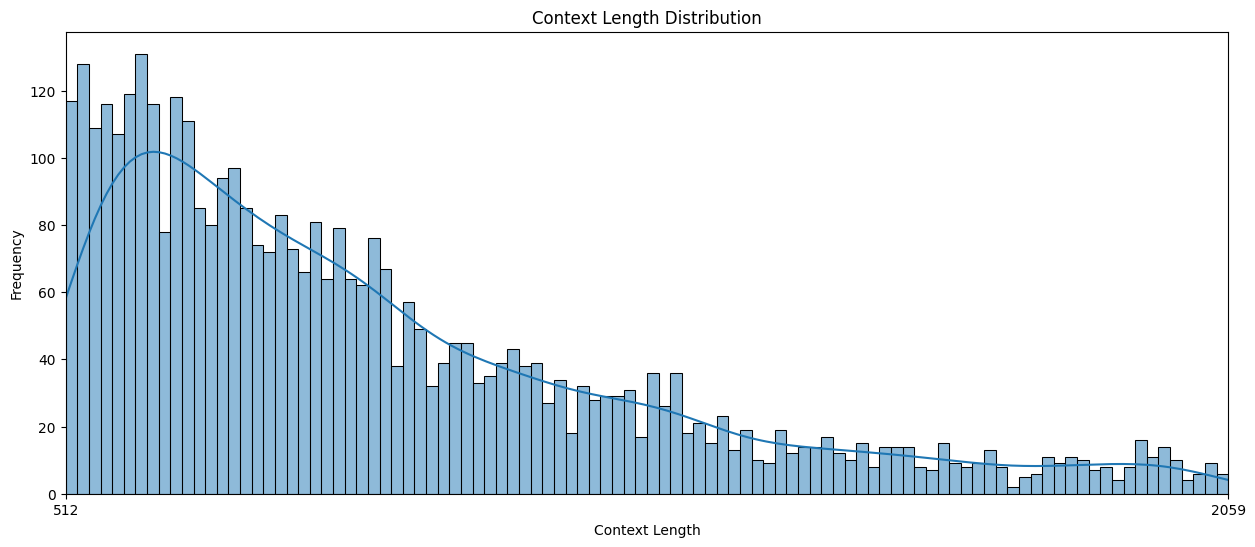

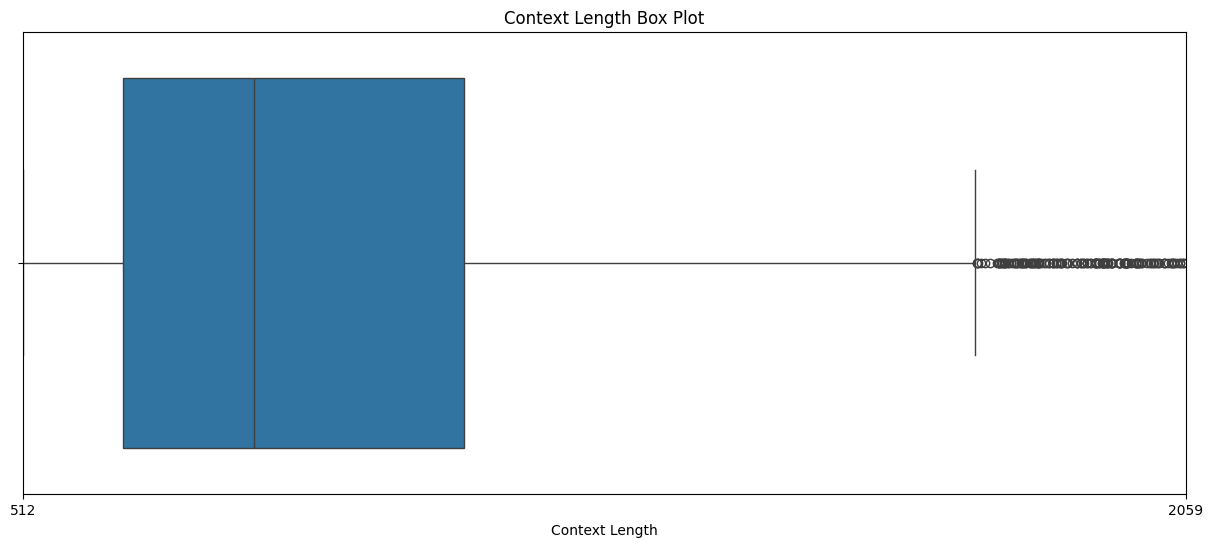

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램
plt.figure(figsize=(15, 6))
sns.histplot(train_df_sorted['context_length'], bins=100, kde=True)
plt.xlim(512, 2059)
plt.xticks([512, 2059])  # x축 눈금 설정
plt.title('Context Length Distribution')
plt.xlabel('Context Length')
plt.ylabel('Frequency')
plt.show()

# 박스 플롯
plt.figure(figsize=(15, 6))
sns.boxplot(x=train_df_sorted['context_length'])
plt.xlim(512, 2059)
plt.xticks([512, 2059])  # x축 눈금 설정
plt.title('Context Length Box Plot')
plt.xlabel('Context Length')
plt.show()


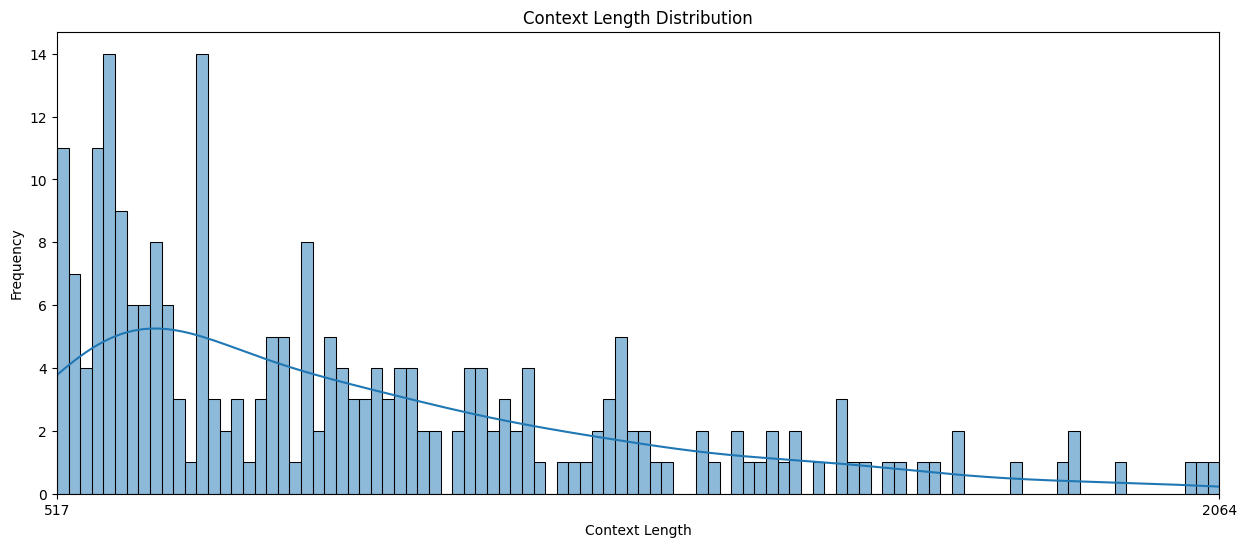

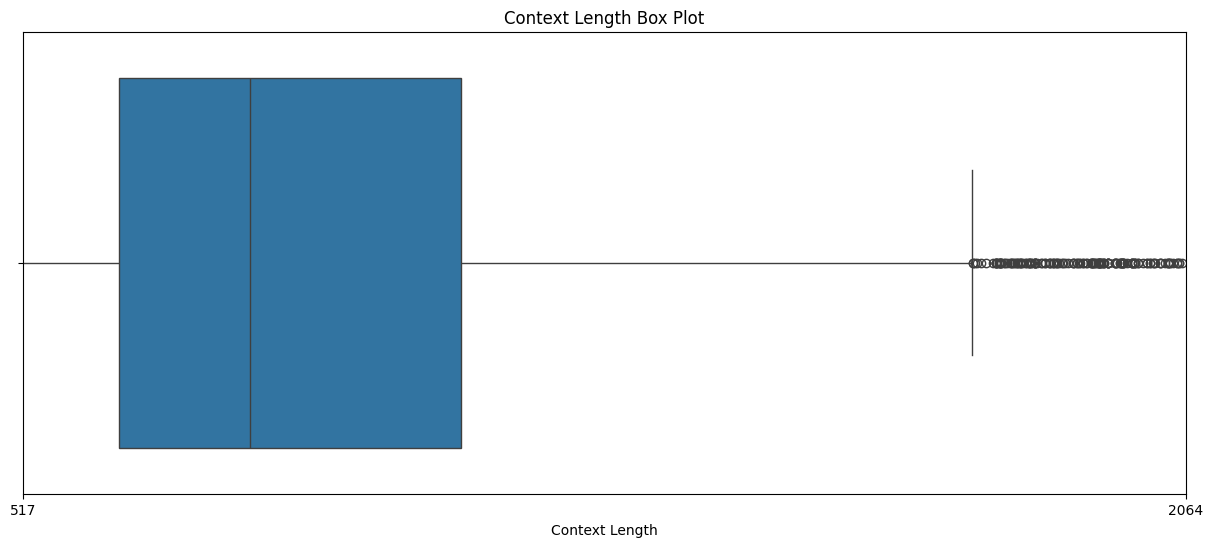

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램
plt.figure(figsize=(15, 6))
sns.histplot(valid_df_sorted['context_length'], bins=100, kde=True)
plt.xlim(517, 2064)
plt.xticks([517, 2064])  # x축 눈금 설정
plt.title('Context Length Distribution')
plt.xlabel('Context Length')
plt.ylabel('Frequency')
plt.show()

# 박스 플롯
plt.figure(figsize=(15, 6))
sns.boxplot(x=train_df_sorted['context_length'])
plt.xlim(517, 2064)
plt.xticks([517, 2064])  # x축 눈금 설정
plt.title('Context Length Box Plot')
plt.xlabel('Context Length')
plt.show()


### 2. 토크나이저 별 데이터셋 분석

#### 2.1 토크나이저 입력 셋팅

In [34]:
# 입력 받기
tokenizer_input = input("tokenizer를 입력하시오 (ex. klue/bert-base): ")
print(f"The entered value is {tokenizer_input}")

The entered value is klue/bert-base


#### 2.2 입력 받은 토크나이저에 대한 로드

In [35]:
# 모듈 임포트
from transformers import AutoTokenizer

In [36]:
# 토크나이저 임포트
tokenizer = AutoTokenizer.from_pretrained(tokenizer_input, use_fast=True)

In [71]:
# 기본 구조 파악
tokenizer

BertTokenizerFast(name_or_path='klue/bert-base', vocab_size=32000, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

#### 2.3 해당 토크나이저로 train에 대한 unk 토큰 인식 분석

In [ ]:
def calculate_unknown_token_ratio(self, tokenizer, contexts):
        unk_token_id = tokenizer.unk_token_id  # UNK 토큰의 ID 가져오기
        unk_ratios = []  # 각 문장의 UNK 토큰 비율을 저장할 리스트
        original_unk_tokens = []  # UNK로 변환된 원래의 토큰들을 저장할 리스트
        total_unk_count = 0  # 전체 문장에 있는 UNK 토큰 개수
        total_token_count = 0  # 전체 문장의 토큰 개수
        
        for context in contexts:
            # 문장을 토큰화하면서 각 토큰의 원래 위치를 저장 (offset_mapping)
            encoding = tokenizer(context, return_offsets_mapping=True, add_special_tokens=False)
            tokens = encoding['input_ids']  # 토큰화된 토큰 ID 리스트
            offsets = encoding['offset_mapping']  # 각 토큰의 원래 문장 내 위치

            # 원본 문장은 단어 단위로 분할
            original_tokens = context.split()

            # UNK 토큰의 개수와 전체 토큰 개수 계산
            unk_count = tokens.count(unk_token_id)
            total_tokens = len(tokens)
            
            # 현재 문장의 UNK 비율 계산
            unk_ratio = unk_count / total_tokens if total_tokens > 0 else 0
            unk_ratios.append(unk_ratio)  # 비율을 리스트에 저장

            # UNK로 변환된 원래의 단어들을 저장
            original_unk = []
            for token_id, offset in zip(tokens, offsets):
                if token_id == unk_token_id:
                    # offset을 사용해 원래 문장에서 UNK로 변환된 단어 찾기
                    start, end = offset
                    original_word = context[start:end]
                    original_unk.append(original_word)
            
            original_unk_tokens.append(original_unk)  # 원래 UNK였던 단어들을 리스트에 저장

            # 전체 UNK 토큰 개수와 전체 토큰 개수를 계속 더해줌
            total_unk_count += unk_count
            total_token_count += total_tokens
        
        # 전체 문장에 대한 총 UNK 비율 계산
        overall_unk_ratio = total_unk_count / total_token_count if total_token_count > 0 else 0
        
        return unk_ratios, original_unk_tokens, overall_unk_ratio

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(tokenizer_input)
dataset = train_df_sorted
train_data = dataset['train']

# 각 문장의 UNK 비율과 UNK로 변환된 원래 단어 계산
unk_ratios, original_unk_tokens, overall_unk_ratio = calculate_unknown_token_ratio(tokenizer, train_data['context'])
train_df['unk_token_ratio'] = unk_ratios  # 각 문장의 UNK 비율을 데이터프레임에 추가
train_df['original_unk_tokens'] = original_unk_tokens  # UNK로 변환된 원래 단어들을 추가